<a href="https://colab.research.google.com/github/BKirill/MLatFIAN2020_homework/blob/main/MLatFIAN2020_seminar03_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston housing dataset

Use the data and model from the seminar:

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
columns = ["CRIM", "RM", "LSTAT"]

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)[columns]
X /= X.max()
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)

model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=0.1)
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  19.312028078112938
test mse =  8.517501881762888


# Task 1

Use `sklearn.model_selection.cross_validate` to perform K-fold cross-validation of the model above. Plot histograms of train and test scores (`"neg_mean_squared_error"`) on the same plot.

Do that for 10 and 100 folds.

See the docs for more details about the function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [4]:
from sklearn.model_selection import cross_validate

In [5]:
# Performing K-fold cross-validation of the model with k = 10, 100
cv10_result = cross_validate(model, X, y, cv=10, 
                           scoring = ('neg_mean_squared_error',), 
                           return_train_score=True)

cv100_result = cross_validate(model, X, y, cv=100, 
                           scoring = ('neg_mean_squared_error',), 
                           return_train_score=True)

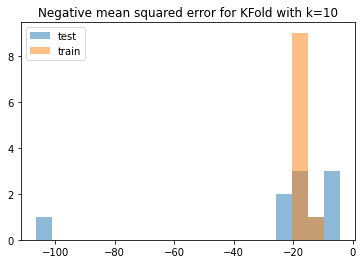

In [6]:
# Plotting the histograms of train and test scores for k=10
test_res = cv10_result['test_neg_mean_squared_error']
train_res = cv10_result['train_neg_mean_squared_error']
bins = np.linspace(np.minimum(test_res.min(), train_res.min()),
                   np.maximum(test_res.max(), train_res.max()), 20)
plt.hist(test_res, bins, alpha=0.5, label='test')
plt.hist(train_res, bins, alpha=0.5, label='train')
plt.legend(loc='upper left')
plt.title('Negative mean squared error for KFold with k=10')
plt.show();

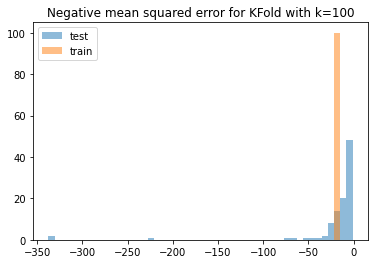

In [7]:
# Plotting the histograms of train and test scores for k=100
test_res = cv100_result['test_neg_mean_squared_error']
train_res = cv100_result['train_neg_mean_squared_error']
bins = np.linspace(np.minimum(test_res.min(), train_res.min()),
                   np.maximum(test_res.max(), train_res.max()), 50)
plt.hist(test_res, bins, alpha=0.5, label='test')
plt.hist(train_res, bins, alpha=0.5, label='train')
plt.legend(loc='upper left')
plt.title('Negative mean squared error for KFold with k=100')
plt.show();